# Exploratory data analysis

## 1. Dataset description




## 2. Load the dataset

In [49]:
library(testthat)
library(MASS)
library(mice)
library(tidyverse)

Warning message:
"package 'mice' was built under R version 3.6.2"
Loading required package: lattice


Attaching package: 'mice'


The following object is masked from 'package:tidyr':

    complete


The following objects are masked from 'package:base':

    cbind, rbind




In [2]:
url <- "https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series"
covid19_confirmed <- read_csv(paste(url, "/time_series_covid19_confirmed_global.csv?raw=true", sep = ""))
covid19_death <- read_csv(paste(url, "/time_series_covid19_deaths_global.csv?raw=true", sep = ""))

Parsed with column specification:
cols(
  .default = col_double(),
  `Province/State` = col_character(),
  `Country/Region` = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  `Province/State` = col_character(),
  `Country/Region` = col_character()
)

See spec(...) for full column specifications.



In [3]:
gov_resp <- read_csv("https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv")

Warning message:
"Missing column names filled in: 'X27' [27]"
Parsed with column specification:
cols(
  .default = col_double(),
  CountryName = col_character(),
  CountryCode = col_character(),
  X27 = col_logical()
)

See spec(...) for full column specifications.



In [4]:
head(covid19_confirmed)

Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,840,906,933,996,1026,1092,1176,1279,1351,1463
NA,Albania,41.1533,20.1683,0,0,0,0,0,0,...,518,539,548,562,584,609,634,663,678,712
NA,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256
NA,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,673,696,704,713,717,717,723,723,731,738
NA,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,24,24,24,24,25,25,25,25
NA,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,23,23,23,23,23,23,24,24,24,24


In [5]:
country_data <- read_csv("../data/clean_data/country_data.csv")

Parsed with column specification:
cols(
  country = col_character(),
  age_1564 = col_double(),
  age_64up = col_double(),
  age_0014 = col_double(),
  smok = col_double(),
  air_polution = col_double(),
  doctor = col_double(),
  nurse_midwivies = col_double()
)



In [6]:
head(gov_resp)

CountryName,CountryCode,Date,S1_School closing,S1_IsGeneral,S2_Workplace closing,S2_IsGeneral,S3_Cancel public events,S3_IsGeneral,S4_Close public transport,...,S9_Monetary measures,S10_Emergency investment in health care,S11_Investment in Vaccines,S12_Testing framework,S13_Contact tracing,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,X27
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
Aruba,ABW,20200101,0,NA,0,NA,0,NA,0,...,0,0,0,0,0,NA,NA,0,0,NA
Aruba,ABW,20200102,0,NA,0,NA,0,NA,0,...,0,0,0,0,0,NA,NA,0,0,NA
Aruba,ABW,20200103,0,NA,0,NA,0,NA,0,...,0,0,0,0,0,NA,NA,0,0,NA
Aruba,ABW,20200104,0,NA,0,NA,0,NA,0,...,0,0,0,0,0,NA,NA,0,0,NA
Aruba,ABW,20200105,0,NA,0,NA,0,NA,0,...,0,0,0,0,0,NA,NA,0,0,NA
Aruba,ABW,20200106,0,NA,0,NA,0,NA,0,...,0,0,0,0,0,NA,NA,0,0,NA


In [7]:
head(country_data)

country,age_1564,age_64up,age_0014,smok,air_polution,doctor,nurse_midwivies
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,54.32490,2.584927,43.09018,NA,56.91081,0.2907,NA
Albania,68.58239,13.744736,17.67287,28.7,18.20060,NA,NA
Algeria,63.48882,6.362497,30.14868,15.6,38.88401,NA,NA
American Samoa,NA,NA,NA,NA,12.47382,NA,NA
Andorra,NA,NA,NA,33.5,10.30762,3.3333,4.0128
Angola,50.97470,2.216374,46.80892,NA,32.38850,NA,NA


## 3. Explore the dataset

In [6]:
dim(covid19_confirmed)

[1] 264  99

In [7]:
colnames(covid19_confirmed)[length(covid19_confirmed)]

[1] "4/25/20"

In [8]:
dim(covid19_death)

[1] 264  99

In [9]:
colnames(covid19_death)[length(covid19_death)]

[1] "4/25/20"

In [50]:
length(unique(gov_resp$CountryName))

[1] 151

In [10]:
test_that("Column names of covid19_confirmed and covid19_death should be the same.",
          {expect_true(all(colnames(covid19_confirmed) == colnames(covid19_death)))
          })

In [11]:
test_that("The country column of covid19_confirmed and covid19_death should be the same.",
          {expect_true(all(covid19_confirmed[2] == covid19_death[2]))
          })

In [12]:
test_that("The last column of covid19_confirmed should not have missing values.",
          {expect_true(all(!is.na(covid19_confirmed[length(covid19_confirmed)])))
          })

In [13]:
test_that("The last column of covid19_death should not have missing values.",
          {expect_true(all(!is.na(covid19_death[length(covid19_death)])))
          })

In [14]:
dim(country_data)

[1] 264   8

## 4. Initial thoughts


## 5. Wrangling

In [8]:
confirmed <- covid19_confirmed[c(2, length(covid19_confirmed))]
colnames(confirmed) = c("country", "n")

confirmed <- confirmed %>%
    group_by(country) %>%
    summarize(confirmed = sum(n))

In [9]:
death <- covid19_death[c(2, length(covid19_death))]
colnames(death) = c("country", "n")

death <- death %>%
    group_by(country) %>%
    summarize(death = sum(n))

In [10]:
covid19 <- merge(confirmed, death, by = "country") %>%
    mutate(rate = death / confirmed)
head(covid19)

country,confirmed,death,rate
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,1463,47,0.03212577
Albania,712,27,0.03792135
Algeria,3256,419,0.12868550
Andorra,738,40,0.05420054
Angola,25,2,0.08000000
Antigua and Barbuda,24,3,0.12500000


In [11]:
dim(covid19)

[1] 185   4

In [12]:
covid19 %>%
    filter(rate >= 1)

country,confirmed,death,rate
<chr>,<dbl>,<dbl>,<dbl>


In [13]:
covid19 %>%
    filter(!country %in% country_data$country)

country,confirmed,death,rate
<chr>,<dbl>,<dbl>,<dbl>
Bahamas,78,11,0.141025641
Brunei,138,1,0.007246377
Burma,146,5,0.034246575
Congo (Brazzaville),200,6,0.030000000
Congo (Kinshasa),416,28,0.067307692
Czechia,7352,218,0.029651795
Diamond Princess,712,13,0.018258427
Egypt,4319,307,0.071081269
Gambia,10,1,0.100000000


In [14]:
date_df <- gov_resp %>%
    group_by(CountryName) %>%
    summarize(Date = max(Date))

In [15]:
gov_resp <- merge(gov_resp, date_df, by=c("CountryName", "Date")) %>%
    select(CountryName, StringencyIndexForDisplay)
colnames(gov_resp) <- c("country", "gov_resp")

In [16]:
gov_resp %>%
    filter(!country %in% covid19$country)

country,gov_resp
<chr>,<dbl>
Aruba,85.71
Bermuda,85.71
Cape Verde,NA
Czech Republic,80.95
Democratic Republic of Congo,85.71
Greenland,71.43
Guam,76.19
Hong Kong,85.71
Kyrgyz Republic,90.48


In [17]:
gov_resp <- gov_resp %>%
    mutate(country = case_when(country == 'Cape Verde' ~ 'Cabo Verde',
                               country == 'Czech Republic' ~ 'Czechia',
                               country == 'Democratic Republic of Congo' ~ 'Congo, Dem. Rep.',
                               country == 'Slovak Republic' ~ 'Slovakia',
                               TRUE ~ country))

In [18]:
country_data <- country_data %>%
    mutate(country = case_when(country == 'Bahamas, The' ~ 'Bahamas',
                               country == 'Brunei Darussalam' ~ 'Brunei',
                               country == 'Egypt, Arab Rep.' ~ 'Egypt',
                               country == 'Gambia, The' ~ 'Gambia',
                               country == 'Iran, Islamic Rep.' ~ 'Iran',
                               country == 'Korea, Dem. People’s Rep.' ~ 'South Korea',
                               country == 'Czech Republic' ~ 'Czechia',
                               country == 'Lao PDR' ~ 'Laos',
                               country == 'Russian Federation' ~ 'Russia',
                               country == 'St. Lucia' ~ 'Saint Lucia',
                               country == 'St. Vincent and the Grenadines' ~ 'Saint Vincent and the Grenadines',
                               country == 'Slovak Republic' ~ 'Slovakia',
                               country == 'Syrian Arab Republic' ~ 'Syria',
                               country == 'Venezuela, RB' ~ 'Venezuela',
                               country == 'Sub-Saharan Africa' ~ 'Western Sahara',
                               country == 'Yemen, Rep.' ~ 'Yemen',
                               TRUE ~ country))

In [19]:
covid19 <- covid19 %>%
    mutate(country = case_when(country == 'Burma' ~ 'Myanmar',
                               country == 'Congo (Brazzaville)' ~ 'Congo, Rep.',
                               country == 'Congo (Kinshasa)' ~ 'Congo, Dem. Rep.',
                               country == 'Korea, South' ~ 'South Korea',
                               country == 'Kyrgyzstan' ~ 'Kyrgyz Republic',
                               country == 'Kyrgyzstan' ~ 'Kyrgyz Republic',
                               country == 'US' ~ 'United States',
                               TRUE ~ country))

In [20]:
covid19 %>%
    filter(!country %in% country_data$country)

country,confirmed,death,rate
<chr>,<dbl>,<dbl>,<dbl>
Diamond Princess,712,13,0.01825843
Holy See,9,0,0.00000000
MS Zaandam,9,2,0.22222222
Saint Kitts and Nevis,15,0,0.00000000
Taiwan*,429,6,0.01398601


In [21]:
gov_resp %>%
    filter(!country %in% covid19$country)

country,gov_resp
<chr>,<dbl>
Aruba,85.71
Bermuda,85.71
Greenland,71.43
Guam,76.19
Hong Kong,85.71
Lesotho,100.00
Macao,66.67
Palestine,54.76
Puerto Rico,80.95


In [31]:
data <- merge(country_data, covid19, by = "country")

In [32]:
dim(data)

[1] 180  11

In [33]:
data <- merge(data, gov_resp, by = "country")

In [34]:
dim(data)

[1] 141  12

In [35]:
head(data)

country,age_1564,age_64up,age_0014,smok,air_polution,doctor,nurse_midwivies,confirmed,death,rate,gov_resp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,54.32490,2.584927,43.09018,NA,56.91081,0.2907,NA,1463,47,0.03212577,71.43
Albania,68.58239,13.744736,17.67287,28.7,18.20060,NA,NA,712,27,0.03792135,85.71
Algeria,63.48882,6.362497,30.14868,15.6,38.88401,NA,NA,3256,419,0.12868550,95.24
Andorra,NA,NA,NA,33.5,10.30762,3.3333,4.0128,738,40,0.05420054,71.43
Angola,50.97470,2.216374,46.80892,NA,32.38850,NA,NA,25,2,0.08000000,71.43
Argentina,64.12128,11.117789,24.76093,21.8,13.31183,NA,NA,3780,185,0.04894180,95.24


In [48]:
data %>%
    arrange(rate)

country,age_1564,age_64up,age_0014,smok,air_polution,doctor,nurse_midwivies,confirmed,death,rate,gov_resp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Chad,50.39318,2.480519,47.12630,NA,66.029206,NA,NA,46,0,0.000000000,66.67
Dominica,NA,NA,NA,NA,19.493154,NA,NA,16,0,0.000000000,78.57
Laos,63.32093,4.075150,32.60392,28.9,25.109538,NA,NA,19,0,0.000000000,85.71
Madagascar,56.34513,2.986717,40.66815,NA,22.542283,NA,NA,123,0,0.000000000,100.00
Mongolia,65.50689,4.083539,30.40957,25.6,40.112849,3.2426,NA,37,0,0.000000000,66.67
Mozambique,52.43844,2.890764,44.67080,16.6,21.298695,NA,NA,70,0,0.000000000,73.81
Namibia,59.45372,3.636032,36.91025,21.4,25.358765,NA,NA,16,0,0.000000000,66.67
Papua New Guinea,60.73880,3.445269,35.81593,36.3,12.294418,NA,NA,8,0,0.000000000,90.48
Rwanda,57.08623,2.938196,39.97557,12.3,43.210217,0.1408,0.8307,183,0,0.000000000,80.95


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



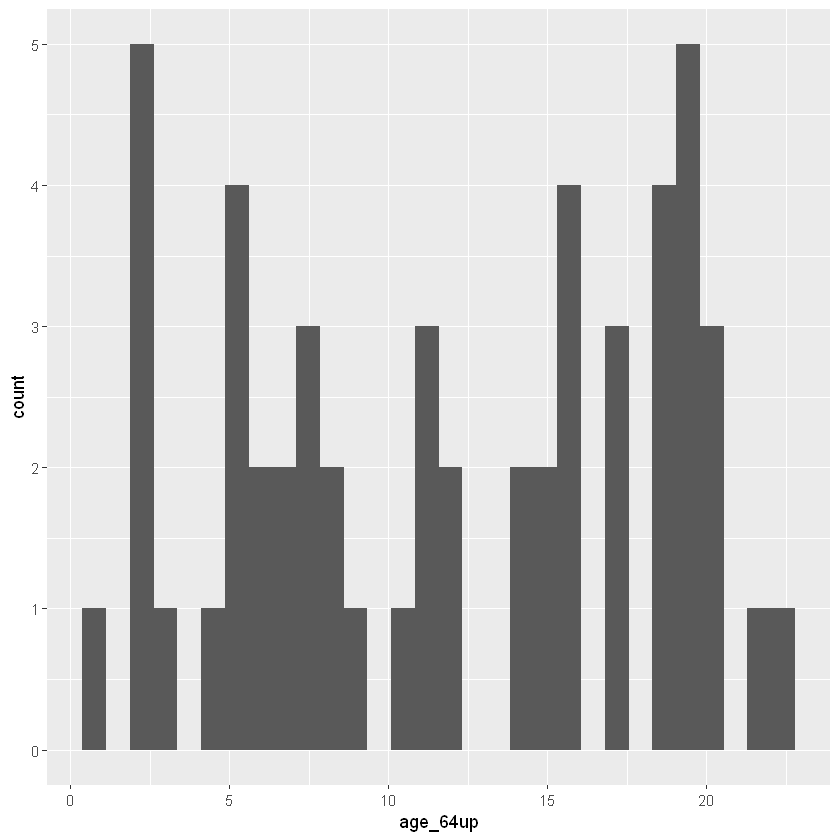

In [78]:
drop_na(data) %>%
    ggplot(aes(age_64up)) +
    geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



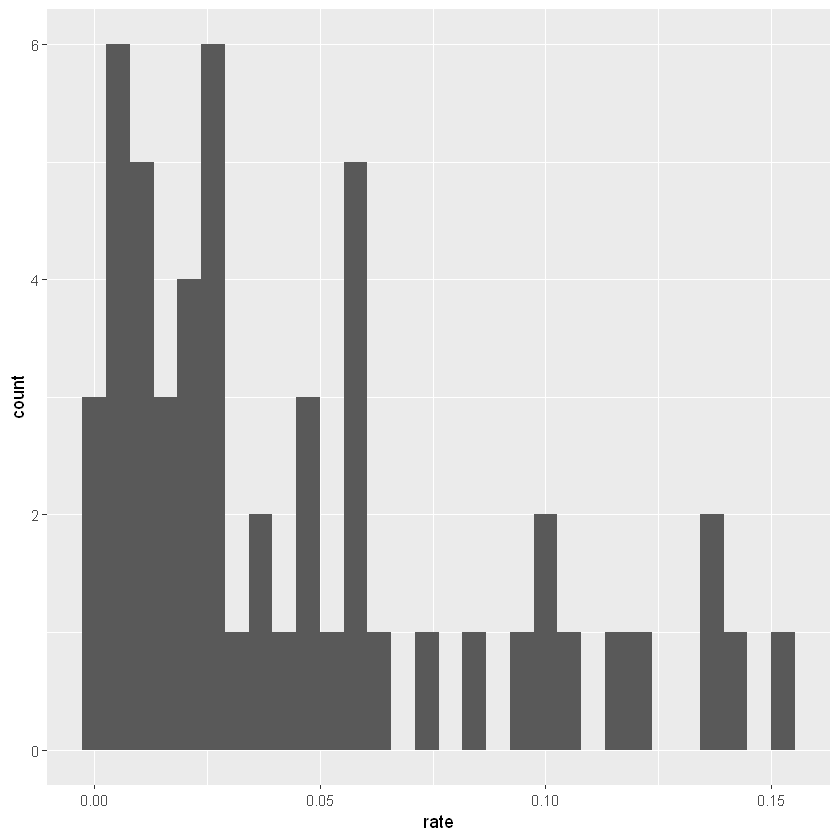

In [79]:
drop_na(data) %>%
    ggplot(aes(rate)) +
    geom_histogram()

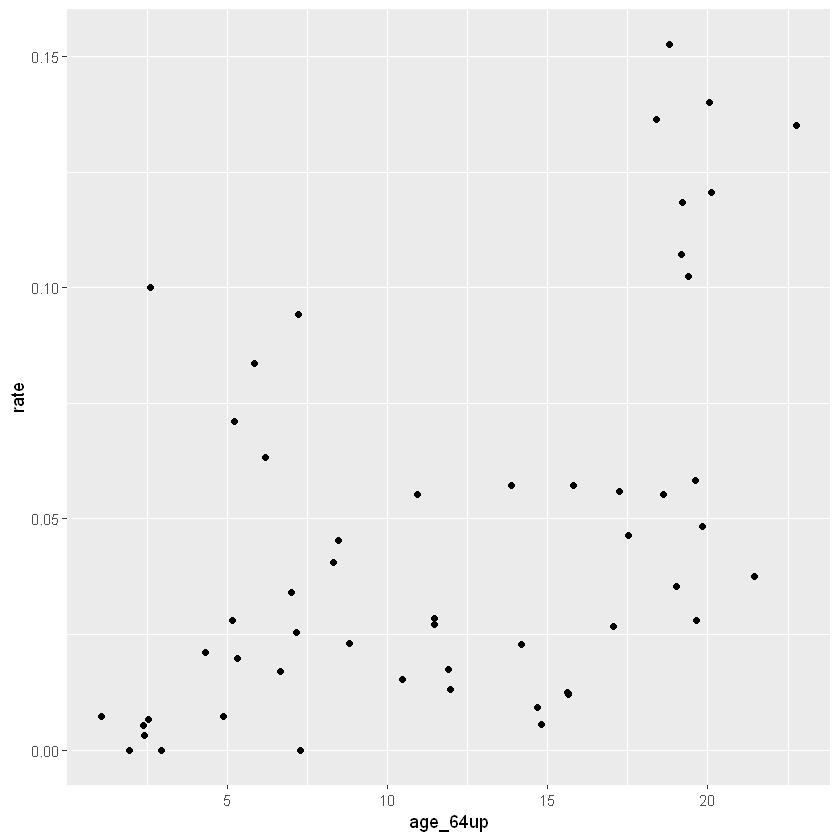

In [43]:
drop_na(data) %>%
    ggplot(aes(age_64up, rate)) +
    geom_point()

## 6. Research questions



## 7. Data Analysis & Visualizations

In [36]:
fit <- lm(rate ~ ., drop_na(data)[c(-1, -9, -10)])
fit %>%
    broom::tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.1104270576,0.0805837822,1.3703385,0.177379070
age_1564,-0.0014372289,0.0010545518,-1.3628813,0.179701335
age_64up,0.0048934996,0.0016439494,2.9766730,0.004677426
smok,0.0005892328,0.0007801717,0.7552605,0.454027794
air_polution,0.0002846902,0.0003903238,0.7293692,0.469555367
doctor,-0.0046169080,0.0078142091,-0.5908350,0.557587055
nurse_midwivies,-0.0015799321,0.0017413977,-0.9072782,0.369092746
gov_resp,-0.0003002955,0.0004026343,-0.7458268,0.459650448


In [37]:
anova(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
age_1564,1,0.0080939916,0.0080939916,6.1901611,0.0166165339
age_64up,1,0.0182341867,0.0182341867,13.9452275,0.0005273459
smok,1,0.0017788850,0.0017788850,1.3604641,0.2496015295
air_polution,1,0.0009659123,0.0009659123,0.7387150,0.3946284994
doctor,1,0.0020873588,0.0020873588,1.5963801,0.2129237359
nurse_midwivies,1,0.0009158973,0.0009158973,0.7004643,0.4070505333
gov_resp,1,0.0007273388,0.0007273388,0.5562576,0.4596504479
Residuals,45,0.0588400872,0.0013075575,NA,NA


In [69]:
fit_base <- lm(rate ~ age_64up, drop_na(data))
fit_base %>%
    broom::tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.007770551,0.0107010402,0.7261492,0.4710668871
age_64up,0.003229163,0.0007933165,4.0704607,0.0001634495


In [74]:
fit_1 <- lm(rate ~ age_64up + doctor, drop_na(data))
fit_1 %>%
    broom::tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.012744144,0.010784906,1.181665,0.242928535
age_64up,0.005104951,0.001269466,4.021339,0.000195385
doctor,-0.011572071,0.006204139,-1.865218,0.068024301


In [75]:
anova(fit_1, fit_base)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
50,0.06467162,NA,NA,NA,NA
51,0.06917152,-1,-0.0044999,3.479037,0.0680243


In [80]:
fit_final <- lm(rate ~ age_64up, data)
fit_final %>%
    broom::tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.032100363,0.0059331693,5.410323,2.779832e-07
age_64up,0.001143764,0.0005249071,2.178985,3.106826e-02


In [81]:
anova(fit_final)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
age_64up,1,0.007561199,0.007561199,4.747974,0.03106826
Residuals,135,0.214988909,0.001592510,NA,NA


## 8. Summary and conclusions
